# GROW INTERN
# DATA SCIENCE INTERNSHIP

## Task 2 :- Credit card fraud detection
### Credit card fraud detection Task By "Syed Sameer Ahamed"

### Task 2 :- (Credit card fraud detection)
This project
employs various machine learning
techniques to analyze historical transaction
data, identify patterns of fraudulent
behavior, and build predictive models to detect
credit card fraud in real-time.

## About dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Problem statement

To predict whether transaction is fraud (class 1) or not (class 0)

### Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import data

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Explore data

In [4]:
df.shape

(11959, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [6]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

44

### Observation


* There are nearly 3 lakh rows and 31 columns in the dataset.
* All the columns are numerical.
* There are no missing values.
* There are some duplicates. I will drop them in data preprocessing step.

### Data preprocessing: Dropping duplicates

In [8]:
df.drop_duplicates(inplace=True)
# View changed shape
df.shape

(11915, 31)

### Data visualization

As features V1 to V28 are PCA transformed, I will visualize only Time, Amount and Class features.

<Axes: xlabel='Time', ylabel='Density'>

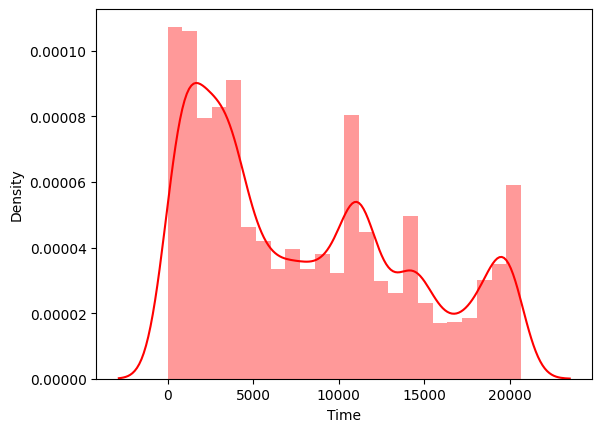

In [9]:
sns.distplot(df['Time'], color = 'red')

<Axes: >

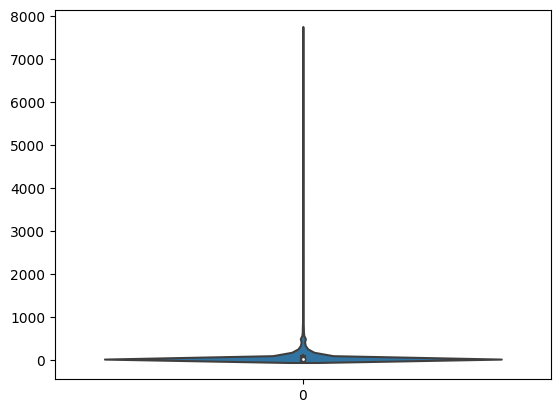

In [10]:
sns.violinplot(df['Amount'])

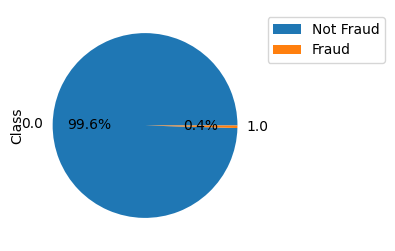

In [11]:
plt.figure(figsize=(3,3))
df['Class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.legend(['Not Fraud','Fraud'], bbox_to_anchor = (1,1))
plt.show()

Only 0.2% fraud data is present.

### Building model: Logistic Regression

In [12]:
# Define x & y
x = df.iloc[:,:-1]
y = df['Class']

In [13]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state=34)

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [15]:
# Initializing model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Fitting training data
lr.fit(xtrain, ytrain)

LogisticRegression()